<a href="https://colab.research.google.com/github/EBNyame/End-To-End-Heart-Disease-Classificaation/blob/main/End_to_End_Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting heart disease using machine learning**
This notebook looks into various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someon has heart disease based on their medical attributes.

## **Features**

This section provides detailed information about each feature in the dataset.

---

### age
- Age of the patient (in years)

---

### sex
- Sex of the patient  
- Values:
  - 1 = Male  
  - 0 = Female

---

### cp (Chest Pain Type)
- Type of chest pain experienced
- Values:
  - 0 — Typical angina: chest pain caused by reduced blood supply to the heart
  - 1 — Atypical angina: chest pain not related to the heart
  - 2 — Non-anginal pain: typically esophageal spasms (non–heart related)
  - 3 — Asymptomatic: no chest pain indicating disease

---

### trestbps
- Resting blood pressure on hospital admission  
- Unit: mm Hg  
- Notes: Values above 130–140 mm Hg are typically a cause for concern

---

### chol
- Serum cholesterol level  
- Unit: mg/dL  
- Formula:
  - LDL + HDL + (0.2 × triglycerides)
- Notes: Values above 200 mg/dL are considered high risk

---

### fbs (Fasting Blood Sugar)
- Indicates whether fasting blood sugar exceeds 120 mg/dL
- Values:
  - 1 = True  
  - 0 = False
- Notes: Levels above 126 mg/dL indicate diabetes

---

### restecg (Resting Electrocardiographic Results)
- ECG results recorded at rest
- Values:
  - 0 — Normal
  - 1 — ST-T wave abnormality  
    - May range from mild symptoms to severe problems  
    - Indicates abnormal heart rhythm
  - 2 — Possible or definite left ventricular hypertrophy  
    - Enlargement of the heart’s main pumping chamber

---

### thalach
- Maximum heart rate achieved during exercise

---

### exang
- Exercise-induced angina
- Values:
  - 1 = Yes  
  - 0 = No

---

### oldpeak
- ST depression induced by exercise relative to rest
- Indicates cardiac stress during physical activity
- Higher values suggest increased heart strain

---

### slope
- Slope of the peak exercise ST segment
- Values:
  - 0 — Upsloping: better heart rate response during exercise (uncommon)
  - 1 — Flat sloping: minimal change (typical healthy heart)
  - 2 — Downsloping: indicator of an unhealthy heart

---

### ca
- Number of major blood vessels (0–3) colored by fluoroscopy
- Notes:
  - Colored vessels indicate visible blood flow
  - Greater blood flow suggests fewer clots

---

### thal
- Thallium stress test result
- Values:
  - 1, 3 — Normal
  - 6 — Fixed defect: previous defect, currently resolved
  - 7 — Reversible defect: impaired blood flow during exercise

---

### target
- Indicates presence of heart disease (predicted attribute)
- Values:
  - 1 = Disease present
  - 0 = No disease


## **Preparing the tools**
I am going to use Pandas, Matplotlib and NumPy

In [1]:
# Import all the tools I need

#regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Models from Scilit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### **Load data**

In [2]:
data = pd.read_csv('heart-disease.csv')
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## **EDA**
The goal here is to find out more about the data and become a subject matter expert on the dataset I am working with.





In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Let's find out how many of each class there
data['target'].value_counts()

,count
target,
1,165
0,138


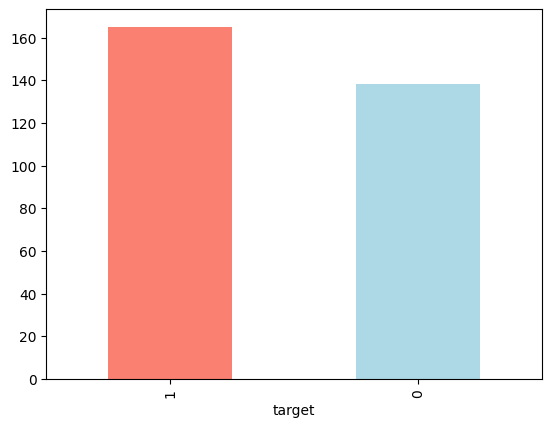

In [6]:
data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
 # Are there any missing values?
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### **Heart Disease Frequency according to sex**

In [9]:
data.sex.value_counts()

,count
sex,
1,207
0,96


In [10]:
# Compare taget column with sex column
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


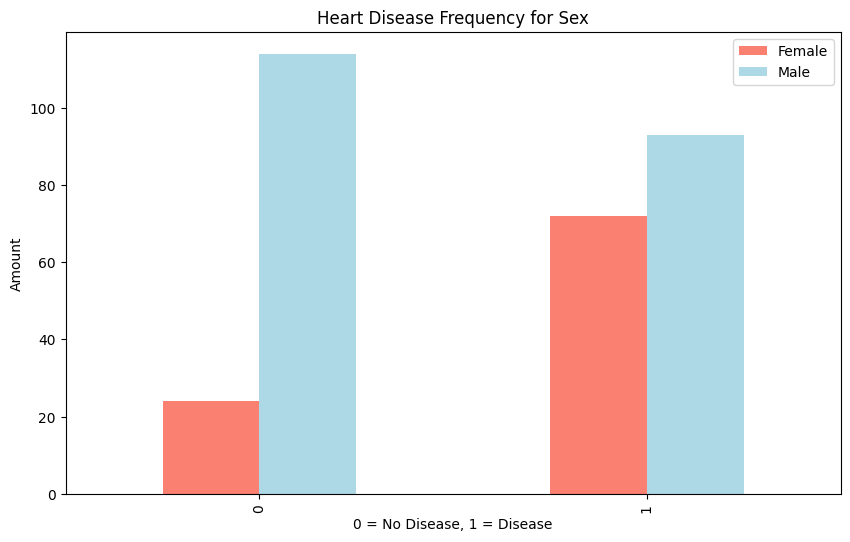

In [11]:
pd.crosstab(data.target, data.sex).plot(
    kind='bar',
    figsize=(10, 6),
    color=['salmon', 'lightblue']
);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

### **Age vs Max Heart Rate for Heart Disease**

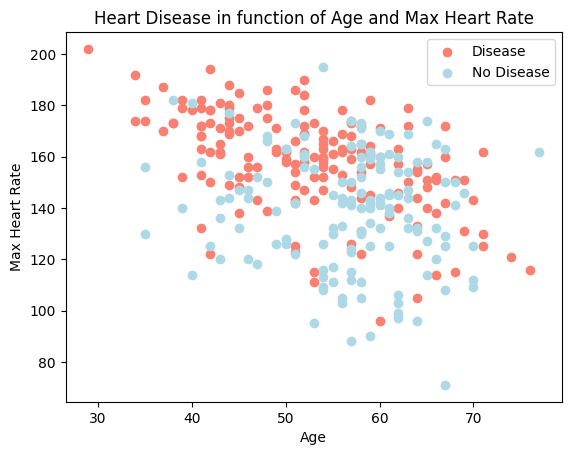

In [12]:
# Scatter with positive examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c='salmon',
            );

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c='lightblue',
            );


# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

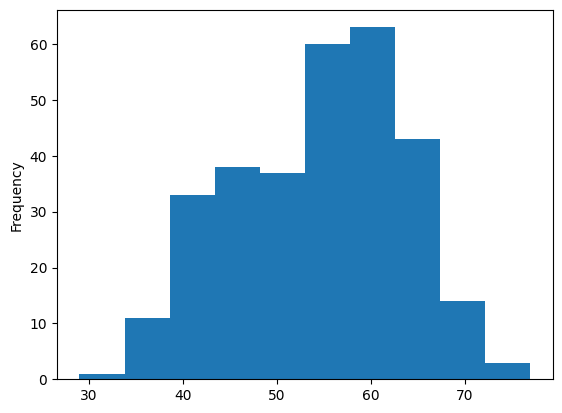

In [13]:
data.age.plot.hist();

### **Heart Disease Frequency per Chest Pain Type**
- Type of chest pain experienced
- Values:
  - 0 — Typical angina: chest pain caused by reduced blood supply to the heart
  - 1 — Atypical angina: chest pain not related to the heart
  - 2 — Non-anginal pain: typically esophageal spasms (non–heart related)
  - 3 — Asymptomatic: no chest pain indicating disease


In [14]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


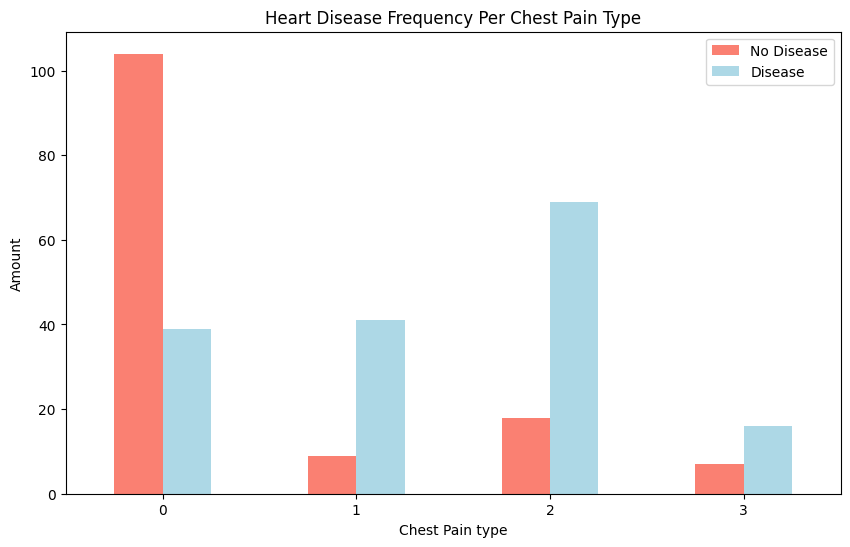

In [15]:
pd.crosstab(data.cp, data.target).plot(kind='bar',
                                       figsize=(10, 6),
                                       color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# make a correlation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

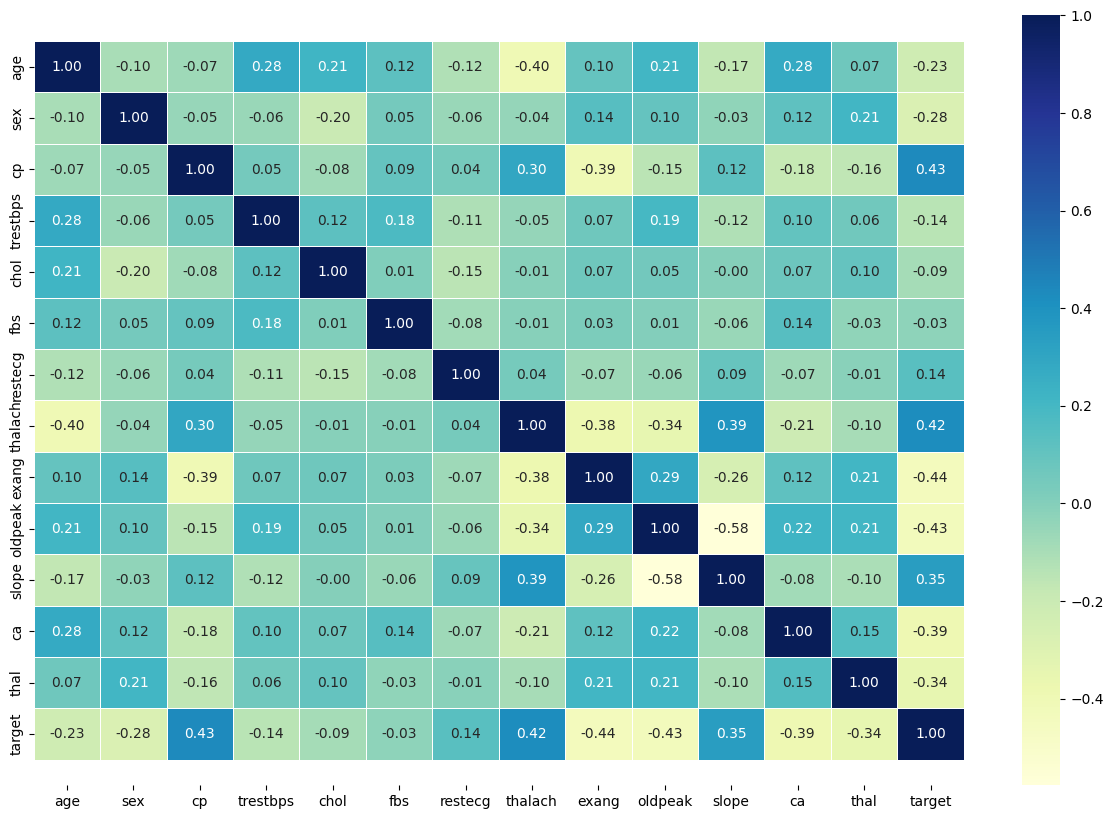

In [18]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

### **Modelling**

In [19]:
 data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# split data into xand y
X = data.drop("target", axis=1)

Y = data['target']

In [21]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [23]:
# Plit data into rrain and test sets
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2
)

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
Y_train, len(Y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now it's time to build a machine learning model since the data is splited into training and test sets.

I am going to train it (find the patterns) on the training set.

And I will test it (use the patterns) on the test set.

I am going try different machine learning models:
- Logistic Regression
- K-Neighbours Classifier
- Random Forest Classifier

In [27]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
  """
  Fits and evaluates given machine learning models.
  models : a different Scikit-Learn machine learning models
  X_train : training data (no labels)
  X_test : testing data (no labels)
  Y_train : training labels
  Y_test : test labels
  """

  # Set random seed
  np.random.seed(42)

  # make a dictionary to keep model scores
  model_scores = {}

  # Loop through models
  for name, model in models.items():

    # fit the model to the data
    model.fit(X_train, Y_train)

    # Evaluate the model and append its score to model_scores
    model.scores[name] = model.score(X_test, Y_test)
  return model_scores

